<a href="https://colab.research.google.com/github/ruman-shaikh/NLP_Project_Grp_1/blob/Ruman/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%pwd

Mounted at /gdrive


'/content'

Copied from Vamsee PCA & Vamsee Classification


In [2]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/Shareddrives/NMA_DL_Dolma_1/Datasets/Sentiment140

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/Shareddrives/NMA_DL_Dolma_1/Datasets/Sentiment140


In [3]:
%ls
%cd EMB_CPY

'Copy of embeddings.pkl'          testingclean.csv
'Copy of test_embeddings.pkl'     training.1600000.processed.noemoticon.csv
'Copy of train_embeddings.pkl'    trainingclean.csv
 EMB_CPY/                         Twitter_Data.csv
 Embeddings/                      val_embeddings.pkl
 testdata.manual.2009.06.14.csv
/gdrive/Shareddrives/NMA_DL_Dolma_1/Datasets/Sentiment140/EMB_CPY


In [4]:
%ls

'Copy of test_embeddings.pkl'   train_embeddings.pkl
'Copy of val_embeddings.pkl'


In [5]:
#All the import statements go here.
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [6]:
#Load sentences and embeddings from pickle

with open('train_embeddings.pkl', "rb") as fIn:
    stored_data = pickle.load(fIn)
    stored_sentences = stored_data['sentences']
    stored_embeddings = stored_data['embeddings']
    stored_labels = stored_data['labels']
  
print(stored_sentences[0], stored_embeddings[0], stored_labels[0])

extremly tired i need to twitter more. ive hopefully finished my tedts otherwise i wont be very happy  [-2.88778935e-02 -8.18428844e-02  1.81801636e-02  2.63865739e-02
  9.00590047e-02 -3.27613875e-02 -4.14048657e-02  1.07470110e-01
  1.03147915e-02  4.55897152e-02 -2.95146704e-02  1.92032335e-03
  5.41128870e-03 -1.90118626e-02  3.42814885e-02 -2.04342627e-03
 -4.95954007e-02  1.37904398e-02 -2.72460897e-02 -1.76961049e-02
 -6.85326904e-02  1.13533661e-02  9.11622867e-03  6.13511205e-02
 -1.17073217e-02 -3.82476486e-03 -7.48713464e-02 -9.44724306e-02
  2.03354359e-02  1.19863066e-03 -4.18541990e-02 -2.27896241e-03
  2.20148452e-02 -3.22894752e-02  5.68830706e-02  1.61096025e-02
 -5.06802984e-02 -2.99397986e-02  1.84467882e-02  1.48600927e-02
  4.95770536e-02 -6.39545172e-02 -5.77736460e-02  2.54267659e-02
 -4.24583293e-02 -7.01110461e-04  3.35834362e-02 -6.83726519e-02
  1.30806454e-02  5.38533479e-02  3.21785286e-02 -2.66244058e-02
  4.39148396e-03 -2.44671274e-02 -2.11120620e-02 -7.

In [ ]:
##copied from Vamsee Classification
##Create dataframe for training data, show first five rows of dataframe and create list of polarities from dataframe


#create dataframe for training data
df=pd.read_csv("trainingclean.csv",encoding='latin-1')

#show first five rows of training dataframe
df.head()

#create list of polarity scores
pol_list=df['polarity'].tolist()

In [ ]:
print(len(stored_embeddings))
print(len(pol_list))

1600000
1600000


In [7]:
import numpy as np
from sklearn.decomposition import PCA, IncrementalPCA

In [8]:
# setting up future axes, maybe?
x = stored_embeddings
y = stored_labels

In [12]:
#run IncrementalPCA on x in batches of 100,000. Takes a while but works.
n_components = 2
ipca = IncrementalPCA(n_components = n_components, batch_size = 100000)
X_ipca = ipca.fit_transform(x)

In [16]:
print(X_ipca.shape)

(960000, 2)


In [14]:
three_dim = IncrementalPCA(batch_size = 100000).fit_transform(x)[:,:3]
two_dim = IncrementalPCA(batch_size = 100000).fit_transform(x)[:,:2]

In [17]:
print(three_dim.shape, two_dim.shape)

(960000, 3) (960000, 2)


In [20]:
#checkings stuff for my own peace of mind
print(len(X_ipca))
print(X_ipca[0])
print(X_ipca[1])
print(X_ipca[2])

print(type(X_ipca))
print(np.size(X_ipca))

960000
[-0.04021999  0.01927781]
[ 0.05931065 -0.16371229]
[ 0.11407856 -0.094712  ]
<class 'numpy.ndarray'>
1920000


In [34]:
len(stored_labels)

960000

(3, 2) (960000, 2)


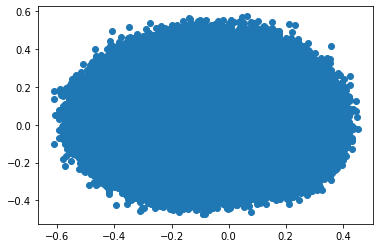

In [28]:
import numpy as np
from matplotlib import pyplot as plt

data = np.array([
    [1, 2],
    [2, 3],
    [3, 6],
])
print(data.shape, X_ipca.shape)

data = X_ipca
x, y = data.T

plt.scatter(x,y)
plt.show()

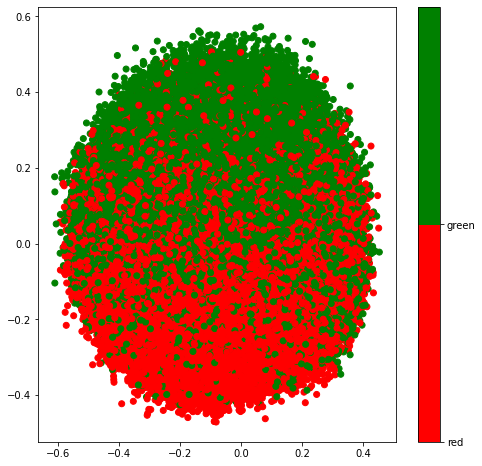

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

data = X_ipca
x, y = data.T
label = stored_labels
colors = ['red','green']

fig = plt.figure(figsize=(8,8))
plt.scatter(x, y, c=label, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

In [9]:
#run IncrementalPCA on x in batches of 100,000. Takes a while but works.
n_components = 3
ipca = IncrementalPCA(n_components = n_components, batch_size = 100000)
X_ipca = ipca.fit_transform(x)

In [10]:
print(X_ipca.shape)

(960000, 3)


In [11]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import pandas as pd

df = pd.DataFrame(X_ipca, columns =['x', 'y', 'z'])
df['labels'] = stored_labels
df.head()

,x,y,z,labels
0,-0.040449,-0.003127,-0.332235,0
1,0.059301,-0.164488,-0.005894,0
2,0.114071,-0.095177,-0.003664,0
3,0.054325,0.003774,0.151004,4
4,0.188658,-0.042761,-0.158643,4


In [13]:
import plotly.express as px

fig = px.scatter_3d(df, x='x', y='y', z='z',
              color='labels')
fig.show()

In [14]:
!nvidia-smi

Fri Jul 22 14:48:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
data = X_ipca

X, Y, Z = data[:,0], data[:,1], data[:,2]
label = stored_labels
colors = ['red','green']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X, Y, Z, color='white', edgecolors='grey', alpha=0.5)
ax.scatter(X, Y, Z, c=label, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

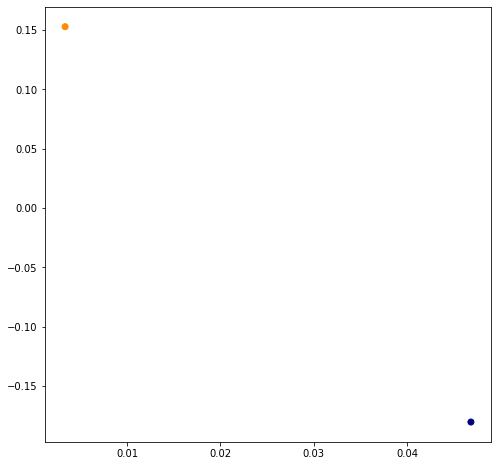

In [ ]:
#Here is where we discover I have no idea how to use MatPlotLib. 
#This does not work
colors = ['navy', 'darkorange']
plt.figure(figsize = (8, 8))

plt.scatter(X_ipca[0], X_ipca[1], c = colors)

plt.show()

In [ ]:
def Kyra_doesnt_know_Matplotlib(Y):
  """
  Plots bivariate data after transformation to new bases. Similar to plot_data
  but with colors corresponding to projections onto basis 1 (red) and
  basis 2 (blue).
  The title indicates the sample correlation calculated from the data.

  Note that samples are re-sorted in ascending order for the first random
  variable.

  Args:
    Y (numpy array of floats) : Data matrix in new basis each column
                                corresponds to a different random variable

  Returns:
    Nothing.
  """

  fig = plt.figure(figsize=[8, 4])
  gs = fig.add_gridspec(2, 2)
  ax3 = fig.add_subplot(gs[:, 1])
  ax3.plot(Y[:, 0], Y[:, 1], '.', color=[.5, .5, .5])
  ax3.axis('equal')
  plt.xlabel('Projection basis vector 1')
  plt.ylabel('Projection basis vector 2')
  plt.title('Sample corr: {:.1f}'.format(np.corrcoef(Y[:, 0], Y[:, 1])[0, 1]))
  plt.show()


In [ ]:
def Kyra_tries_another_thing(X_ipca, colors, target_names):
  plt.figure(figsize=(8, 8))
  for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(
            X_ipca[y == i, 0],
            X_ipca[y == i, 1],
            color=color,
            lw=2,
            label=target_name,
        )
  plt.show()

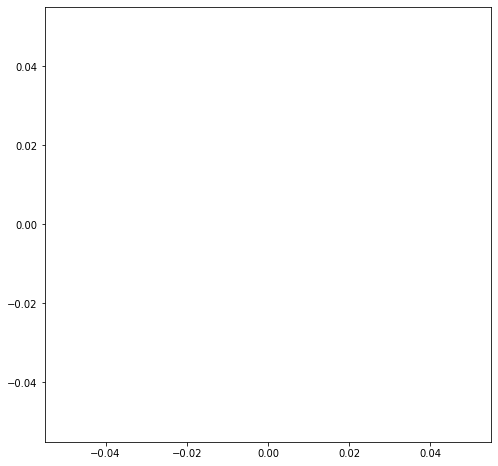

In [ ]:
#This did not work
Kyra_tries_another_thing(X_ipca, colors, pol_list)

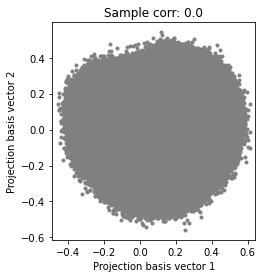

In [ ]:
#plot_data_new_basis(X_ipca)
Kyra_doesnt_know_Matplotlib(X_ipca)

In [ ]:
# @title Example for Kyra Help
##Copied from https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
print(type(pol_list))
pol_array = np.array(pol_list)
print(len(pol_array))
print(type(pol_array))
print(np.size(pol_array))

<class 'list'>
1600000
<class 'numpy.ndarray'>
1600000


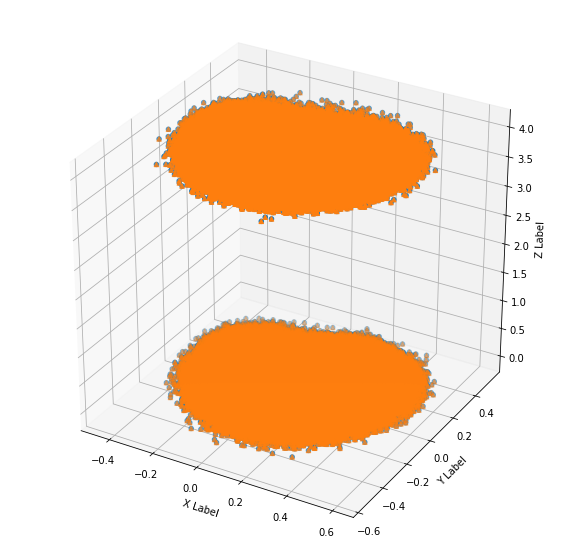

In [ ]:
##Copied from https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html


fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')


for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = X_ipca[:,0]
    ys = X_ipca[:,1]
    zs = pol_array
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Everything beneath this cell is copied directly from NMA CN PCA Tutorial where they build their own functions for PCA as well as a function to plot the PCA and correlation (This is under "Helper Functions"). - Kyra

In [ ]:
# @title Helper functions (from NMA CN PCA Tutorial)

## This function plots the output of the PCA function defined below. (Copied from NMA CN PCA Tutorial)
def plot_data_new_basis(Y):
  """
  Plots bivariate data after transformation to new bases. Similar to plot_data
  but with colors corresponding to projections onto basis 1 (red) and
  basis 2 (blue).
  The title indicates the sample correlation calculated from the data.

  Note that samples are re-sorted in ascending order for the first random
  variable.

  Args:
    Y (numpy array of floats) : Data matrix in new basis each column
                                corresponds to a different random variable

  Returns:
    Nothing.
  """

  fig = plt.figure(figsize=[8, 4])
  gs = fig.add_gridspec(2, 2)
  ax1 = fig.add_subplot(gs[0, 0])
  ax1.plot(Y[:, 0], 'r')
  plt.ylabel('Projection \n basis vector 1')
  ax2 = fig.add_subplot(gs[1, 0])
  ax2.plot(Y[:, 1], 'b')
  plt.xlabel('Sample number')
  plt.ylabel('Projection \n basis vector 2')
  ax3 = fig.add_subplot(gs[:, 1])
  ax3.plot(Y[:, 0], Y[:, 1], '.', color=[.5, .5, .5])
  ax3.axis('equal')
  plt.xlabel('Projection basis vector 1')
  plt.ylabel('Projection basis vector 2')
  plt.title('Sample corr: {:.1f}'.format(np.corrcoef(Y[:, 0], Y[:, 1])[0, 1]))
  plt.show()

## This function sorts the eigenvalues and eigenvectors in descending order.
def sort_evals_descending(evals, evectors):
  """
  Sorts eigenvalues and eigenvectors in decreasing order. Also aligns first two
  eigenvectors to be in first two quadrants (if 2D).

  Args:
    evals (numpy array of floats)    : Vector of eigenvalues
    evectors (numpy array of floats) : Corresponding matrix of eigenvectors
                                        each column corresponds to a different
                                        eigenvalue

  Returns:
    (numpy array of floats)          : Vector of eigenvalues after sorting
    (numpy array of floats)          : Matrix of eigenvectors after sorting
  """

  index = np.flip(np.argsort(evals))
  evals = evals[index]
  evectors = evectors[:, index]
  if evals.shape[0] == 2:
    if np.arccos(np.matmul(evectors[:, 0],
                           1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
      evectors[:, 0] = -evectors[:, 0]
    if np.arccos(np.matmul(evectors[:, 1],
                           1 / np.sqrt(2) * np.array([-1, 1]))) > np.pi / 2:
      evectors[:, 1] = -evectors[:, 1]
  return evals, evectors

## This function calculates the covariance matrix. 
def get_sample_cov_matrix(X):
  """
  Returns the sample covariance matrix of data X

  Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable

  Returns:
    (numpy array of floats)   : Covariance matrix
  """

  # Subtract the mean of X
  X = X - np.mean(X, 0)

  # Calculate the covariance matrix (hint: use np.matmul)
  cov_matrix = (1/X.shape[0]) * X.T @ X

  return cov_matrix

In [ ]:
# @title NMA CN Tutorial PCA Function 

## This is the function they build for PCA in NMA CN tutorial, just to see what's going on on the inside.

def pca(X):
  """
  Sorts eigenvalues and eigenvectors in decreasing order.

  Args:
    X (numpy array of floats): Data matrix each column corresponds to a
                               different random variable

  Returns:
    (numpy array of floats)  : Data projected onto the new basis
    (numpy array of floats)  : Vector of eigenvalues
    (numpy array of floats)  : Corresponding matrix of eigenvectors

  """


  # Calculate the sample covariance matrix
  cov_matrix = get_sample_cov_matrix(X)

  # Calculate the eigenvalues and eigenvectors
  evals, evectors = np.linalg.eigh(cov_matrix)

  # Sort the eigenvalues in descending order
  evals, evectors = sort_evals_descending(evals, evectors)

  # Project the data onto the new eigenvector basis
  score = np.matmul(X, evectors)

  return score, evectors, evals




In [ ]:
# Perform PCA on the data matrix X <- replace the X with our data (should be numpy array)
score, evectors, evals = pca(X)

# Plot the data projected into the new basis
plot_data_new_basis(score)